In [4]:
! pip install kaggle


In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download corrieaar/apartment-rental-offers-in-germany

 96% 89.0M/93.0M [00:03<00:00, 35.3MB/s]
100% 93.0M/93.0M [00:03<00:00, 27.4MB/s]


In [9]:
! unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


ایمپورت پکیج های مورد نیاز و خواندن دیتاست

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
realstate = pd.read_csv("immo_data.csv")
realstate

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


همانطور که مشاهده می کنیم دیتاست ما در کل دارای ۲۶۸۸۵۰ سطر و ۴۹ ستون می باشد.

In [14]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

می توانیم عناوین جهل و نه ستون خود را و همینطور نوع داده متناظر هر ستون را دربالا ببینیم
دارای ۲۴ ستون کمی و ۲۵ ستون کیفی می باشیم

In [15]:
realstate.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

می بینیم در دیتاست ما ستون های بسیاری هستند که شامل کمبود و عدم حضور داده هستند.
در بعضی از ستون ها تعداد داده های مفقود نزدیک به تعداد کل سطرها یا رکوردها می باشد.
خیلی از این ستون ها باتوجه به سوال هایی که با آن مواجه هستیم از اهمیت چندانی برخوردار نیستند و می توانیم از آن ها چشم پوشی کرد.
بعضی از ستون ها را حذف و بعضی از ستون ها را با مقادیر دلخواه جایگذاری می کنیم.

In [25]:
realstate1 = realstate.drop(['telekomHybridUploadSpeed', 'noParkSpaces', 'interiorQual', 'petsAllowed', 'thermalChar', 'heatingCosts', 'energyEfficiencyClass', 'energyEfficiencyClass', 'electricityBasePrice', 'electricityKwhPrice', 'picturecount', 'description'], axis=1)
realstate1.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,facilities,lastRefurbish,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,4.62,10.0,840.0,1965.0,...,1.0,3.0,4,True,4,Dortmund,Schüren,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,3.47,10.0,NaN,1871.0,...,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN,2019.0,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.72,2.4,1300.0,2019.0,...,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,1.53,40.0,NaN,1964.0,...,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,2.46,NaN,903.0,1950.0,...,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,Feb20


ستون هایی را که حاوی داده ی مفقود زیادی بودند و یا فاقد ارزش محاسباتی بودند را حذف کردیم

In [26]:
realstate1.duplicated().sum()

0

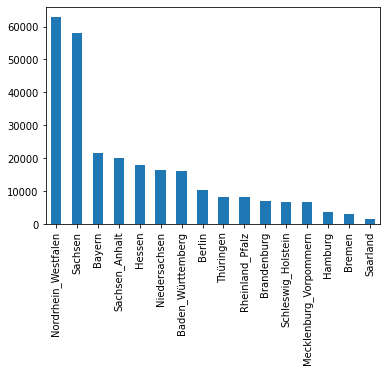

In [27]:
realstate1.regio1.value_counts().plot(kind="bar")

تعداد آگهی در مناطق مختلف

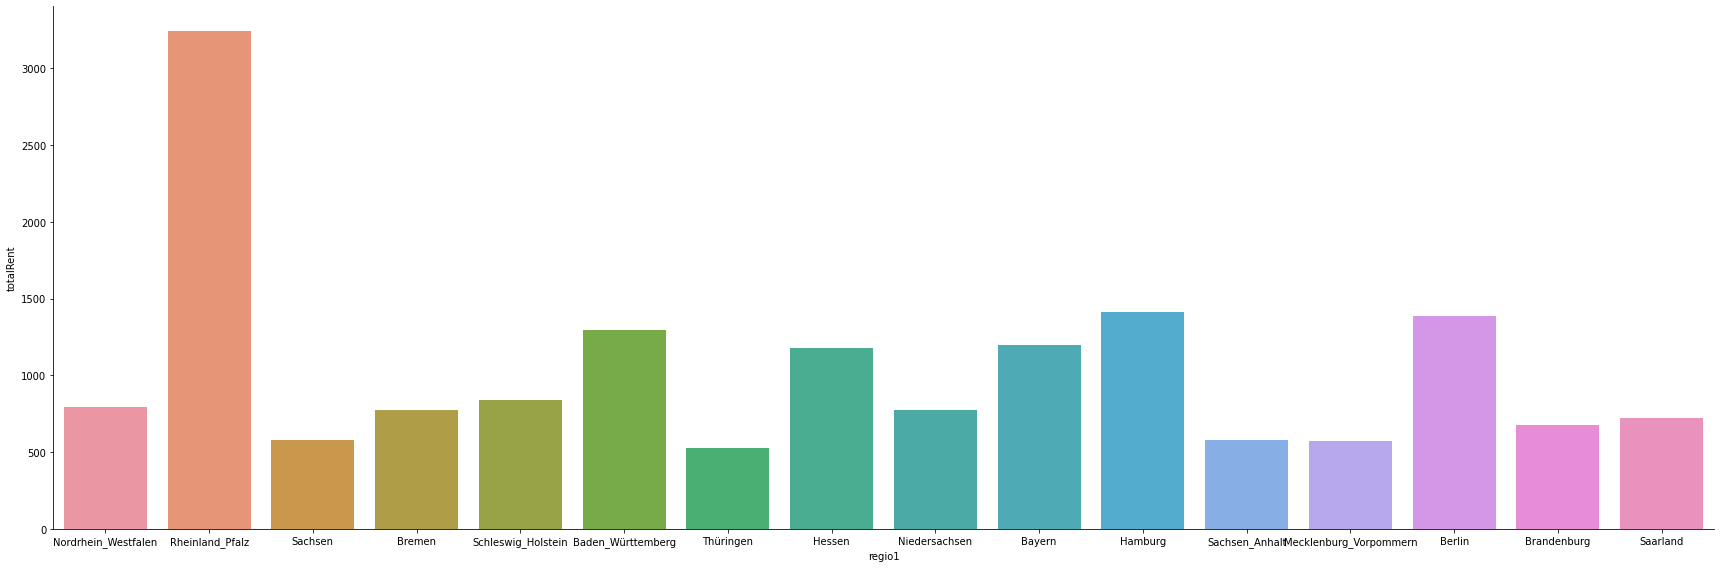

In [32]:
sns.catplot(x="regio1",y='totalRent' ,kind="bar", data=realstate1,ci=None, height=8, aspect=3)

بررسی قیمت در مناطق مختلف جغرافیایی

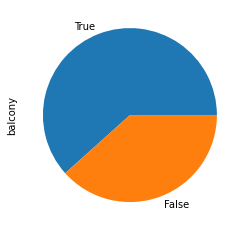

In [24]:
realstate1.balcony.value_counts().plot(kind="pie")

تعداد خانه هایی که بالکن دارند و تعداد خانه هایی که بالکن ندارند

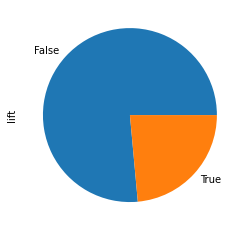

In [28]:
realstate1.lift.value_counts().plot(kind="pie")

نسبت خانه هایی که آسانسور دارند و خانه هایی که آسانسور ندارند.

نصب پکیج پای اسپارک و ایجاد سشن و خواندن دیتاست

In [36]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 67.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=6757b47d1c3b148b6c198cb08d884a47b6e98957c4833ebe0994d2f5b184ab18
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [37]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [47]:
from pyspark.sql.types import *
Schema=StructType([
  StructField('regio1',StringType(),nullable=True),
  StructField('serviceCharge',FloatType(),nullable=True),
  StructField('heatingType',StringType(),nullable=True),
  StructField('telekomTvOffer',FloatType(),nullable=True),
  StructField('newlyConst',BooleanType(),nullable=True),
  StructField('balcony',BooleanType(),nullable=True),
  StructField('pricetrend',FloatType(),nullable=True),
  StructField('telekomUploadSpeed',FloatType(),nullable=True)
])
realstate2 = spark.read.option("header","true").schema(Schema).csv('immo_data.csv')
realstate2.show(10,False)

+-----------------------------------------------------------------------------------------------------------+-------------+---------------------------------------------------------------------------------------------------------------------------------------+--------------+----------+-------+----------+------------------+
|regio1                                                                                                     |serviceCharge|heatingType                                                                                                                            |telekomTvOffer|newlyConst|balcony|pricetrend|telekomUploadSpeed|
+-----------------------------------------------------------------------------------------------------------+-------------+---------------------------------------------------------------------------------------------------------------------------------------+--------------+----------+-------+----------+------------------+
|Nordrhein_Westfalen        

In [48]:
realstate2.dtypes

[('regio1', 'string'),
 ('serviceCharge', 'float'),
 ('heatingType', 'string'),
 ('telekomTvOffer', 'float'),
 ('newlyConst', 'boolean'),
 ('balcony', 'boolean'),
 ('pricetrend', 'float'),
 ('telekomUploadSpeed', 'float')]

با realstate2.drop('input') 
داده های نامطلوب و فاقد مقدار را حذف می کنیم